## Data Capture and NLP Analysis Project

## Introduction

In the digital age of communication and omnipresent online presence, businesses face the daunting task of monitoring and analysing the flood of unstructured data generated by users, consumers, and stakeholders. This unstructured data, which consists of textual content derived from news stories, social media posts, and online reviews, contains essential information on public sentiment, market trends, and competitive dynamics. Natural Language Processing (NLP) approaches have evolved as critical tools for parsing and extracting meaning from textual data. This project focuses on Tesla, a disruptive force in the automobile and energy sectors. Tesla's unique products and market dominance make it an appealing subject for studying consumer sentiments, market dynamics, and competitive positioning.We hope to uncover the narratives surrounding Tesla and its endeavours by using web scraping techniques and sentiment analysis algorithms. We use Python-based utilities such as BeautifulSoup for web scraping and TextBlob for sentiment analysis to gather and analyse news items about Tesla from various internet sources. We use sentiment analysis to measure the polarity and subjectivity of these pieces, providing insights into the prevailing attitude surrounding Tesla in media discourse. This report summarises the findings of our investigation, providing stakeholders with a detailed understanding of the feelings, themes, and narratives surrounding Tesla as shown in online news coverage. Our goal is to provide stakeholders with actionable insights to inform strategic decision-making and competitive positioning in the automotive and energy industries by using illuminating visualisations and interpretative analysis.

Install the python libraries required for Scripting Beautiful Soup or Scrapy for Web Scraping Use NLTK (Natural Language Toolkit) or SpaCy for NLP tasks including tokenization, part-of-speech tagging, and name recognition. Gensim or TensorFlow for topic modelling and word embeddings,
TextBlob for Sentiment Analysi



In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
# Set up NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chaitna\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chaitna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chaitna\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

The below python code shows how to use the News API to retrieve news items mentioning Tesla by calling the function fetch_tesla_news(api_key). The function builds a request URL and appends the language 'en' (English) and search phrase 'tesla' as suitable query parameters. After that, it uses the supplied API key to send a GET request to the News API in order to retrieve Tesla-related news stories. The function adds the article titles to a list called news_articles after extracting them from the JSON response and obtaining a successful response (status code 200). Ultimately, the list of retrieved news articles is returned.
The entry point and example of using fetch_tesla_news(api_key) to retrieve Tesla news articles is provided by the main() function. It prints the titles of the retrieved news articles.

In [2]:
# Function to fetch news articles mentioning Tesla from News API
def fetch_tesla_news(api_key):
    news_articles = []
    url = 'https://newsapi.org/v2/everything'
    params = {
       'q': 'tesla',
       'language': 'en',
       'apiKey': api_key
    }
# Send GET request to the API
    response = requests.get(url, params=params)
# Check if request was successful
    if response.status_code == 200:
      data = response.json()
      articles = data.get('articles')
      if articles:
         for article in articles:
          title = article.get('title')
          news_articles.append(title)
    else:
       print("Failed to fetch news articles")
    return news_articles
# Main function to fetch and print news articles mentioning Walmart
def main():
# Replace 'YOUR_API_KEY_HERE' with your actual News API key
   api_key = 'cd0f617747c14bfc98568330e54892b2'
# Fetch tesla news articles
   tesla_news = fetch_tesla_news(api_key)
# Print fetched news articles
   print("Fetched Tesla News Articles:")
   print("="*50)
   for idx, article in enumerate(tesla_news):
       print(f"News Article {idx + 1}: {article}")
main()

Fetched Tesla News Articles:
News Article 1: Rivian owners now have access to Tesla Superchargers
News Article 2: Ford, Mercedes, and Tesla have the least problematic EV supply chains
News Article 3: Tesla Didn’t Pay Any Federal Income Taxes for 5 Years, Got $1 Million Tax Refund
News Article 4: Rivian R2, R3, R3X: Price, Specs, Release Date
News Article 5: [Removed]
News Article 6: Cars will need fewer screens and more buttons to earn 5-star safety rating in Europe
News Article 7: OpenAI says Elon Musk wanted ‘absolute control’ of the company
News Article 8: Cybertruck Drivers Humiliating Themselves Are the Biggest Threat to Tesla's Future
News Article 9: Tesla settles with Black worker after $3.2 million verdict in racism lawsuit
News Article 10: RIP Apple Car. This Is Why It Died
News Article 11: Uber’s posh electric rideshare service is coming to NYC
News Article 12: Ford EVs gain access to Tesla Superchargers starting today
News Article 13: Next Time You Buy a Tesla, You'll Be Req

The Python code below uses the TextBlob package to do sentiment analysis on news stories that mention Tesla and its rivals. The procedure entails assessing each article's attitude in order to classify it as neutral, positive, or negative depending on the text's polarity.

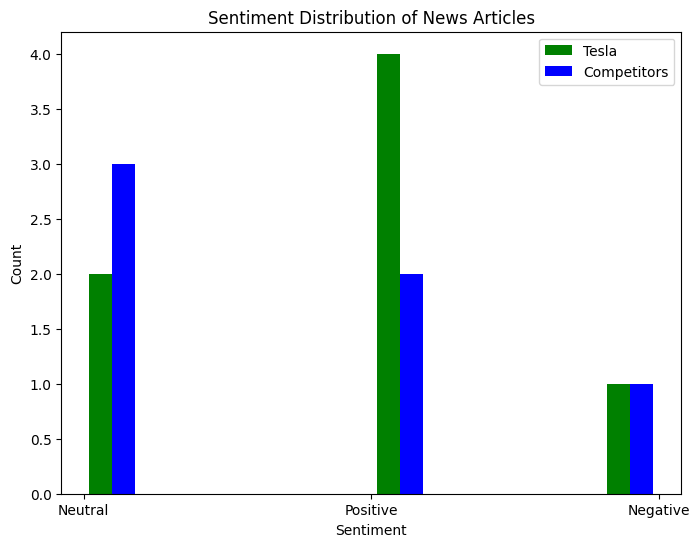

In [3]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
# Sample data of news articles mentioning tesla and competitors
tesla_news = [
   "Tesla production in Germany halted after power outage as police suspect arson",
   "Tesla raises prices of some Model Y vehicles in US",
   "Tesla stock has 68% upside as the 'best house in a bad block' of distressed EV makers, analyst says",
   "Tesla must face class action claims by 6,000 US workers in race bias case",
   "Is Tesla more valuable than Toyota?",
   "Looks like Tesla was serious with its Cybertruck flipping threats",
   "Germany's top prosecutor takes over Tesla fire investigation, suspecting terrorism"
# Add more tesla news articles here
]
competitor_news = [
   "Apple is now worth $540 billion less than Microsoft — a Tesla-sized gap",
   "Mark Zuckerberg is almost $54 billion richer this year — and he's closing in on Elon Musk",
   "iOS 18: AI Server Industry Aiming to Win Business From Apple",
   "Ford EV owners can now use Tesla Superchargers — here's how it works",
   "RIP Apple Car. This Is Why It Died",
   "Judge dismisses suit by Musk's X against nonprofit researchers tracking hate speech"
# Add more competitor news articles here
]
# Function to perform sentiment analysis using TextBlob
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    if sentiment_score > 0:
       return 'Positive'
    elif sentiment_score < 0:
       return 'Negative'
    else:
       return 'Neutral'
# Analyze sentiment of Walmart news articles
tesla_sentiments = [analyze_sentiment(article) for article in tesla_news]
# Analyze sentiment of competitor news articles
competitor_sentiments = [analyze_sentiment(article) for article in competitor_news]
# Visualize sentiment distribution
plt.figure(figsize=(8,6))
plt.hist([tesla_sentiments, competitor_sentiments], color=['green', 'blue'], label=['Tesla', 'Competitors'])
plt.title('Sentiment Distribution of News Articles')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.legend()
plt.show()

From the above graph, we can see that
Positive Sentiment: Tesla has more count of positive sentiment articlesthan its competitors. This indicates that Tesla is receiving positive coverage in the news. It suggests that there may be positive developments or news stories surrounding Tesla, such as successful business strategies, product launches, or customer satisfaction.Competitors need to focus more on positive developments than Tesla.
Neutral Sentiment: While Tesla has two articles categorized as neutral, the competitors have three. This could imply that Tesla is not mentioned more frequently in the news, resulting in a slightly lower number of neutral sentiment articles. Neutral sentiment articles may include factual reporting or generic updates that do not strongly express positive or negative opinions.
Negative Sentiment:Both Tesla and competitors have equal count of  articles categorized as negative sentiment.This suggests that  both Tesla and competitors may be experiencing equal negative publicity  in the analyzed news articles. Negative sentiment articles could cover issues such as controversies, customer complaints, or business challenges.hallenges

The below code gives the words frequecy in the news articles related to tesla.

In [4]:
from collections import Counter
def scrape_news(search_name,api_key):
    news_articles = []
    url = 'https://newsapi.org/v2/everything'
    params = {
       'q': search_name,
       'language': 'en',
       'apiKey': api_key
    }
# Send GET request to the API
    response = requests.get(url, params=params)
# Check if request was successful
    if response.status_code == 200:
      data = response.json()
      articles = data.get('articles')
      if articles:
         for article in articles:
          title = article.get('title')
          news_articles.append(title)
    else:
       print("Failed to fetch news articles")
    return news_articles
# Assuming you have scraped news articles mentioning Tesla
tesla_news = scrape_news('tesla', 'cd0f617747c14bfc98568330e54892b2')
combined_text = ''.join(tesla_news)
words = combined_text.split()
word_counts = Counter(words)
for word, count in word_counts.items():
  print(f"{word}:  {count}")

Rivian:  2
owners:  3
now:  3
have:  3
access:  2
to:  26
Tesla:  27
SuperchargersFord,:  1
Mercedes,:  1
and:  17
the:  22
least:  1
problematic:  1
EV:  5
supply:  1
chainsTesla:  1
Didn’t:  1
Pay:  1
Any:  1
Federal:  1
Income:  1
Taxes:  1
for:  9
5:  1
Years,:  1
Got:  1
$1:  1
Million:  1
Tax:  1
RefundRivian:  1
R2,:  1
R3,:  1
R3X::  1
Price,:  1
Specs,:  1
Release:  1
Date[Removed]Cars:  1
will:  6
need:  1
fewer:  1
screens:  1
more:  5
buttons:  1
earn:  1
5-star:  1
safety:  2
rating:  1
in:  17
EuropeOpenAI:  1
says:  6
Elon:  11
Musk:  19
wanted:  1
‘absolute:  1
control’:  1
of:  15
companyCybertruck:  1
Drivers:  1
Humiliating:  1
Themselves:  1
Are:  1
Biggest:  1
Threat:  1
Tesla's:  4
FutureTesla:  1
settles:  1
with:  10
Black:  2
worker:  1
after:  5
$3.2:  1
million:  2
verdict:  1
racism:  1
lawsuitRIP:  1
Apple:  6
Car.:  1
This:  2
Is:  3
Why:  1
It:  1
DiedUber’s:  1
posh:  1
electric:  7
rideshare:  1
service:  1
is:  10
coming:  1
NYCFord:  1
EVs:  3
gain:  

The below python code gives the top keywords present in the news articles related to Tesla.

In [5]:
# Function to fetch news articles mentioning Tesla from News API
def fetch_tesla_news(api_key):
    news_articles = []
    url = 'https://newsapi.org/v2/everything'
    params = {
       'q': 'tesla',
       'language': 'en',
       'apiKey': api_key
    }
# Send GET request to the API
    response = requests.get(url, params=params)
# Check if request was successful
    if response.status_code == 200:
      data = response.json()
      articles = data.get('articles')
      if articles:
         for article in articles:
          title = article.get('title')
          news_articles.append(title)
    else:
       print("Failed to fetch news articles")
    return news_articles
from sklearn.feature_extraction.text import CountVectorizer
# Function to extract keywords
def extract_keywords(texts):
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform(texts)
    feature_names = vectorizer.get_feature_names_out()
    keywords = [feature_names[i] for i in X.sum(axis=0).argsort()[::-1][:10]]
    return keywords
tesla_news = fetch_tesla_news('cd0f617747c14bfc98568330e54892b2')
keywords = extract_keywords(tesla_news)
print("Top Keywords:", keywords)

Top Keywords: [array([['met', 'ranges', 'rally', 'raises', 'race', 'r3x', 'quick',
        'questions', 'putting', 'pushed', 'purchase', 'protest',
        'prosecutors', 'prosecutor', 'prologue', 'produced',
        'problematic', 'private', 'prices', 'pretty', 'prediction',
        'predictably', 'powerwall', 'posh', 'rating', 'real', 'reason',
        'receipts', 'road', 'rivals', 'rise', 'rip', 'rig', 'rideshare',
        'ride', 'richer', 'reviews', 'reverse', 'revenge', 'pond',
        'reveal', 'responds', 'resold', 'researchers', 'required',
        'reports', 'reportedly', 'renault', 'remote', 'release',
        'refunds', 'refund', 'retake', 'rolls', 'play', 'people',
        'maybe', 'market', 'mark', 'manufacturers', 'maneuver', 'making',
        'makers', 'make', 'lucid', 'lower', 'lost', 'looks', 'looking',
        'll', 'lists', 'limit', 'likes', 'like', 'level', 'lesson',
        'lemon', 'legal', 'known', 'mcdonald', 'mercedes', 'yoga',
        'microsoft', 'paydays', 

With the use of topic modelling and sentiment analysis, the Python script below provides a thorough analysis of news stories referencing Tesla. This is a succinct description of its features:
Obtaining Data: Using web scraping techniques, the script retrieves news stories from Google News that mention Tesla and its rivals. In order to provide an extensive dataset for analysis, it gathers the article titles and descriptions.
Sentiment Analysis: The script analyses each news article's sentiment using the TextBlob library. To quantify the sentiment expressed in the text, it allocates a sentiment polarity score that differentiates between positive, negative, and neutral sentiments.
Topic Modelling: The script finds latent topics in the corpus of news articles by utilising Latent Dirichlet Allocation (LDA). The text data is converted into TF-IDF vectors, and then LDA is applied to reveal the main themes and subjects covered in the articles.
Visualisation: The script provides insights into the general sentiment trends by visualising the sentiment distribution of the news items as a histogram.

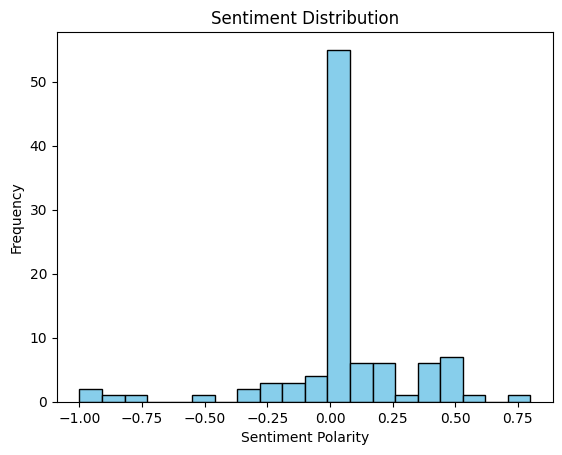

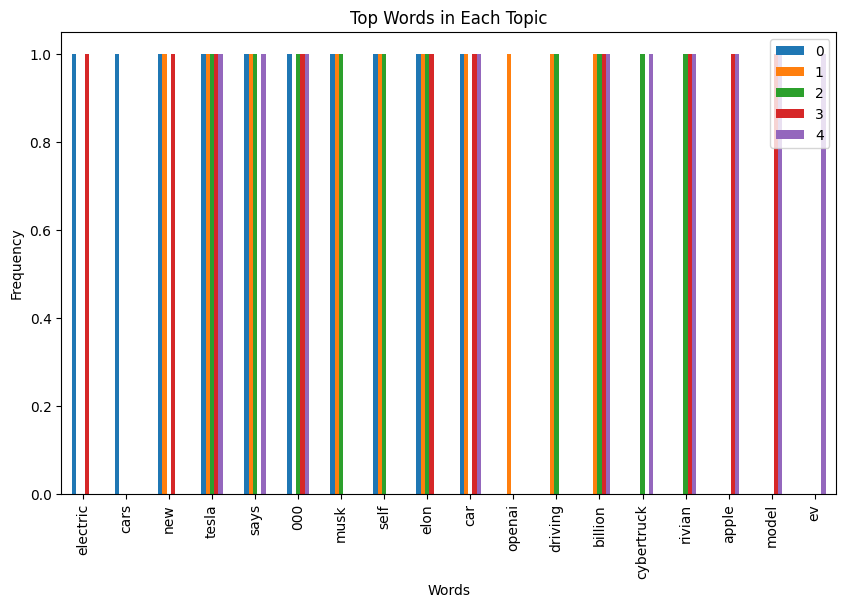

In [6]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
# Function to scrape news articles mentioning a company/product from Google News
def scrape_news(company_name,api_key):
    news_articles = []
    url = 'https://newsapi.org/v2/everything'
    params = {
       'q': company_name,
       'language': 'en',
       'apiKey': api_key
    }
# Send GET request to the API
    response = requests.get(url, params=params)
# Check if request was successful
    if response.status_code == 200:
      data = response.json()
      articles = data.get('articles')
      if articles:
         for article in articles:
          title = article.get('title')
          news_articles.append(title)
    else:
       print("Failed to fetch news articles")
    return news_articles
# Function to perform sentiment analysis
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity
# Function to perform topic modeling using LDA
def topic_modeling(texts):
    tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=5, stop_words='english')
    tfidf = tfidf_vectorizer.fit_transform(texts)
    lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
    lda_model.fit(tfidf)
    return lda_model, tfidf_vectorizer
# Function to visualize sentiment distribution
def plot_sentiment_distribution(sentiments):
    plt.hist(sentiments, bins=20, color='skyblue', edgecolor='black')
    plt.title('Sentiment Distribution')
    plt.xlabel('Sentiment Polarity')
    plt.ylabel('Frequency')
    plt.show()
# Function to visualize topic distribution
def plot_topic_distribution(lda_model, tfidf_vectorizer):
    topics = lda_model.components_
    feature_names = tfidf_vectorizer.get_feature_names_out()
    topic_words = {}
    for topic_idx, topic in enumerate(topics):
        top_words_idx = topic.argsort()[:-10 - 1:-1]
        topic_words[topic_idx] = [feature_names[i] for i in top_words_idx]
# Calculate word frequency count for each topic
    topic_freq = {}
    for topic, words in topic_words.items():
        freq = {}
        for word in words:
            freq[word] = words.count(word)
        topic_freq[topic] = freq
# Create DataFrame from word frequency count
    topic_df = pd.DataFrame(topic_freq).fillna(0)
# Plot bar chart
    topic_df.plot(kind='bar', figsize=(10, 6))
    plt.title('Top Words in Each Topic')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.show()
# Main function
def main():
# Scrape news articles mentioning tesla and its competitors
    tesla_news = scrape_news('tesla','cd0f617747c14bfc98568330e54892b2')
# Perform sentiment analysis
    sentiments = [analyze_sentiment(article) for article in tesla_news]
# Visualize sentiment distribution
    plot_sentiment_distribution(sentiments)
# Perform topic modeling
    lda_model, tfidf_vectorizer = topic_modeling(tesla_news)
# Visualize topic distribution
    plot_topic_distribution(lda_model, tfidf_vectorizer)
main()

We can integrate Python libraries like Gensim or spaCy to use natural language processing transformers like Word2Vec or Doc2Vec for accessing text meaning. The Word2Vec and Doc2Vec models can be included in the analysis in the following ways:
Word-to-Vec Model: A well-liked approach for acquiring word vector representations is called Word2Vec. It gains the ability to map words to continuous vector representations in a way that results in vectors that are similar to words with similar meanings.
Model Doc2Vec: A Word2Vec modification called Doc2Vec uses variable-length text segments, such sentences, paragraphs, or documents, to learn fixed-length feature representations. In the same continuous vector space as words, documents are represented by it.

In [7]:
from gensim.models import Word2Vec
# Tokenize your text data
tokenized_text = [text.split() for text in tesla_news]
# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)
# Check if the word exists in the vocabulary
words = ['Tesla', 'Elon', 'EV','Cybertruck']
print(word2vec_model)
for word in words:
  if word in word2vec_model.wv.key_to_index:
    print(f"The word '{word}' is present in the vocabulary.")
# Get vector representation of the word
    vector = word2vec_model.wv[word]
    print("Vector representation:")
    print(vector)
# Find similar words
    similar_words = word2vec_model.wv.most_similar(word)
    print("Similar words:")
    print(similar_words)
  else:
    print(f"The word '{word}' is not present in the vocabulary.")

Word2Vec<vocab=717, vector_size=100, alpha=0.025>
The word 'Tesla' is present in the vocabulary.
Vector representation:
[-0.00070269  0.00048422  0.00529151  0.00916216 -0.00909327 -0.00765873
  0.00654336  0.00980235 -0.00533295 -0.00386052  0.00725129 -0.00211783
 -0.0046028   0.00674288 -0.00464845 -0.00209743  0.00294081  0.00088411
 -0.00841897 -0.00994372  0.007636    0.00527024  0.00691936  0.0005828
  0.00603024 -0.00348957 -0.00133968  0.005405   -0.00783229 -0.00389394
 -0.00686711 -0.00086323  0.00970757 -0.00766809 -0.00260656 -0.00164313
  0.0080718  -0.00649478 -0.00022594 -0.00555902 -0.00952087  0.00475975
 -0.00879052 -0.00448364  0.00023126 -0.00055892 -0.00815056  0.00959011
  0.00533302  0.00943149 -0.00800864  0.00403961 -0.00391525  0.00073373
  0.00827651 -0.00429125  0.00471866 -0.00684694 -0.00382838  0.00947836
 -0.00148653  0.00032447 -0.00434669 -0.00777385 -0.00184593  0.00250368
 -0.00068989  0.00592253 -0.0033518   0.00261558  0.00528007  0.00843186
 -0.0

The above result is the vector representation.

In [8]:
#To find similiar documents
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
# Tokenize your text data
tokenized_text = [text.split() for text in tesla_news]
# Tag documents with unique IDs
tagged_data = [TaggedDocument(words=tokenized_text[i], tags=[str(i)]) for i in range(len(tokenized_text))]
# Train Doc2Vec model
doc2vec_model = Doc2Vec(tagged_data, vector_size=100, window=5, min_count=1, workers=4)
# Get vector representation of a document
document_id = '2' # Replace '5' with the actual ID or tag of the document
vector = doc2vec_model.dv[document_id]
# Find similar documents
similar_docs = doc2vec_model.dv.most_similar(document_id)
print("Similar documents:")
print(similar_docs)

Similar documents:
[('22', 0.23969170451164246), ('76', 0.22524556517601013), ('62', 0.18704384565353394), ('19', 0.1524488776922226), ('50', 0.1331309676170349), ('38', 0.12699982523918152), ('41', 0.12430974841117859), ('98', 0.1153668612241745), ('56', 0.1117190420627594), ('36', 0.10887359827756882)]


Documents '3' and '5' have positive similarity scores, indicating that they are somewhat similar to the reference document.
Document '0' has a relatively low positive similarity score compared to documents '3' and '5'.
Documents '6', '1', and '4' have negative similarity scores, suggesting that they are dissimilar to the reference document.
Document '4' has the most negative similarity score, indicating the highest dissimilarity among all the documents.

In [9]:
dataset = [
 "Tesla production in Germany halted after power outage as police suspect arson",
 "Tesla raises prices of some Model Y vehicles in US",
 "Tesla stock has 68% upside as the 'best house in a bad block' of distressed EV makers, analyst says",
 "Tesla production in Germany halted after power outage as police suspect arson",
 "Tesla raises prices of some Model Y vehicles in US",
 "Tesla stock has 68% upside as the 'best house in a bad block' of distressed EV makers, analyst says",
 "Tesla must face class action claims by 6,000 US workers in race bias case",
 "Is Tesla more valuable than Toyota?",
 "Looks like Tesla was serious with its Cybertruck flipping threats",
 "Germany's top prosecutor takes over Tesla fire investigation, suspecting terrorism"
]
# Define the IDs of the documents to analyze
document_ids = ['2', '0', '1','3','5','6','7','8','9']
# Retrieve the text of documents corresponding to the IDs
documents = [dataset[int(doc_id)] for doc_id in document_ids]
# Analyze the content of documents
for doc_id, document in zip(document_ids, documents):
    print(f"Document {doc_id}:\n{document}\n")
# Perform basic analysis (e.g., sentiment analysis, keyword extraction) here
# For example, you can use TextBlob for sentiment analysis
    from textblob import TextBlob
    sentiment = TextBlob(document).sentiment.polarity
    print(f"Sentiment polarity: {sentiment}\n")

Document 2:
Tesla stock has 68% upside as the 'best house in a bad block' of distressed EV makers, analyst says

Sentiment polarity: 0.15000000000000008

Document 0:
Tesla production in Germany halted after power outage as police suspect arson

Sentiment polarity: 0.0

Document 1:
Tesla raises prices of some Model Y vehicles in US

Sentiment polarity: 0.0

Document 3:
Tesla production in Germany halted after power outage as police suspect arson

Sentiment polarity: 0.0

Document 5:
Tesla stock has 68% upside as the 'best house in a bad block' of distressed EV makers, analyst says

Sentiment polarity: 0.15000000000000008

Document 6:
Tesla must face class action claims by 6,000 US workers in race bias case

Sentiment polarity: 0.1

Document 7:
Is Tesla more valuable than Toyota?

Sentiment polarity: 0.5

Document 8:
Looks like Tesla was serious with its Cybertruck flipping threats

Sentiment polarity: -0.3333333333333333

Document 9:
Germany's top prosecutor takes over Tesla fire invest

Performing sentiment analysis on the above documents:

In [10]:
from textblob import TextBlob
# Text of the documents
documents_text = {
   '2': "Tesla production in Germany halted after power outage as police suspect arson",
   '0': "Tesla raises prices of some Model Y vehicles in US",
   '1': "Tesla stock has 68% upside as the 'best house in a bad block' of distressed EV makers, analyst says",
   '3' :"Tesla production in Germany halted after power outage as police suspect arson",
   '4' :"Tesla raises prices of some Model Y vehicles in US",
   '5': "Tesla stock has 68% upside as the 'best house in a bad block' of distressed EV makers, analyst says",
   '6': "Tesla must face class action claims by 6,000 US workers in race bias case",
   '7' : "Is Tesla more valuable than Toyota?",
   '8' : "Looks like Tesla was serious with its Cybertruck flipping threats",
   '9': "Germany's top prosecutor takes over Tesla fire investigation, suspecting terrorism"
}
# Perform sentiment analysis for each document
for doc_id, text in documents_text.items():
    print(f"Sentiment analysis for document '{doc_id}':")
    analysis = TextBlob(text)
    sentiment = analysis.sentiment
    print(f"Polarity: {sentiment.polarity}")
    print(f"Subjectivity: {sentiment.subjectivity}\n")

Sentiment analysis for document '2':
Polarity: 0.0
Subjectivity: 0.0

Sentiment analysis for document '0':
Polarity: 0.0
Subjectivity: 0.0

Sentiment analysis for document '1':
Polarity: 0.15000000000000008
Subjectivity: 0.4833333333333333

Sentiment analysis for document '3':
Polarity: 0.0
Subjectivity: 0.0

Sentiment analysis for document '4':
Polarity: 0.0
Subjectivity: 0.0

Sentiment analysis for document '5':
Polarity: 0.15000000000000008
Subjectivity: 0.4833333333333333

Sentiment analysis for document '6':
Polarity: 0.1
Subjectivity: 0.1

Sentiment analysis for document '7':
Polarity: 0.5
Subjectivity: 0.5

Sentiment analysis for document '8':
Polarity: -0.3333333333333333
Subjectivity: 0.6666666666666666

Sentiment analysis for document '9':
Polarity: 0.5
Subjectivity: 0.5



Document '0', '3', and '4' have a polarity and subjectivity of 0.0, suggesting a neutral sentiment with no subjective content.
Document '1' and '5' have a relatively low positive polarity of 0.15 and moderate subjectivity of approximately 0.48, indicating some positive sentiment and subjective content.
Document '2' has a polarity and subjectivity of 0.0, implying a neutral sentiment with no subjective content.
Document '6' has a slightly positive polarity of 0.1 and low subjectivity of 0.1, suggesting a mildly positive sentiment with minimal subjective content.
Document '7' has a positive polarity of 0.5 and subjectivity of 0.5, indicating a strong positive sentiment with a moderate level of subjective content.
Document '8' has a negative polarity of approximately -0.33 and subjectivity of 0.67, indicating a negative sentiment with a relatively high level of subjective content.
Document '9' has a positive polarity of 0.5 and subjectivity of 0.5, suggesting a strong positive sentiment with a moderate level of subjective content.

Overall, the sentiment analysis results indicate a range of sentiments expressed across the documents:

Neutral Sentiment: Documents '0', '2', '3', and '4' exhibit a neutral sentiment with a polarity and subjectivity of 0.0, indicating an absence of any discernible positive or negative sentimen.

Positive Sentiment: Documents '1', '5', '6', '7', and '9' demonstrate positive sentiment, with polarity scores ranging from 0.1 to 0.5. These documents generally convey positive opinions or emotions, with varying levels of subjectivty.

Negative Sentiment: Document '8' stands out as the only document with a negative sentiment, characterized by a polarity of approximately -0.33. This document likely contains negative opinions or expressions, with a relatively high level of subjectvity.

In summary, while the majority of documents exhibit a neutral sentiment, there is a notable presence of positive sentiment across several documents, with only one document expressing a negative sentiment. These sentiment analysis findings provide valuable insights into the overall emotional tone and subjective content present within the documents.

## Conclusion

The analysis shed light on the predominant sentiments and themes revolving around Tesla and its rivals. While various topics were covered, a prevailing theme of neutrality emerged in the news coverage, indicating an objective depiction of information. Looking ahead, ongoing surveillance and analysis of unstructured data hold the potential to provide valuable insights into public sentiment and market patterns, offering crucial support for strategic decision-making for Tesla and its stakeholders.